In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\tanzh\Documents\Python\Pandas for Everyone\datasets\epi_sim.txt")

In [3]:
data.shape # there is over 9m rows 

(9434653, 6)

In [4]:
data.head(10)

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135
5,3,40,294301186,1,201,0.000135
6,3,40,301957749,1,201,0.000135
7,3,40,290904046,1,201,0.000135
8,3,40,288207887,1,201,0.000135
9,3,40,294563871,1,201,0.000135


In [6]:
data.ig_type.unique()

array([3, 2], dtype=int64)

In [7]:
# lets count the number of interventions for each replicate, intervention time and treatment value

count_only = data.groupby(["rep", "intervened","tr"]).ig_type.count()
print(count_only.head(10))

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64


In [8]:
type(count_only) # the above hroupby statement does not return a regular dataframe 
# the above results take the form of a multi-index Series 
# if we want to do another groupby operation, we have to pass in the levels parameter to refer to the multi-index levels
# here we pass in [0,1,2] for the first, second and third index levels respectively

pandas.core.series.Series

In [11]:
count_mean = count_only.groupby(level=[0,1,2]).mean()
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
Name: ig_type, dtype: int64


In [12]:
# we then combine all these operation in a single command 
# this show that we can pass in a level to perform an additional groupby calculation

count_mean_revised = data.groupby(["rep","intervened","tr"]).ig_type.count().groupby(level=[0,1,2]).mean()
print(count_mean_revised)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64


In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

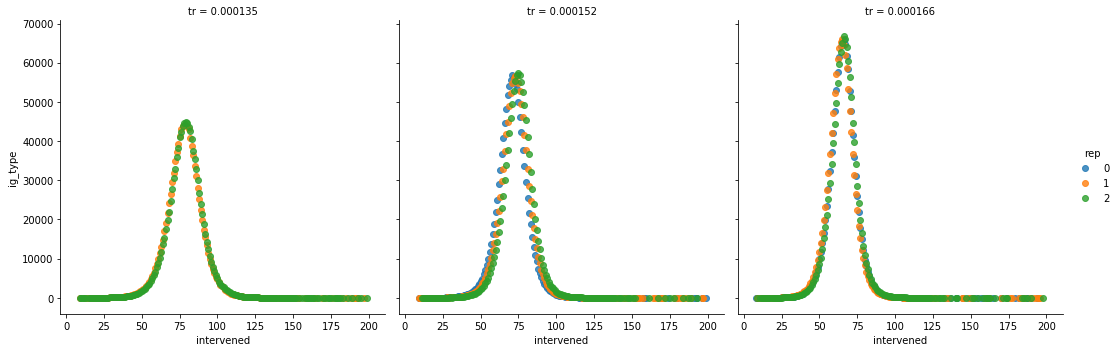

In [14]:
fig = sns.lmplot(x ="intervened", y = "ig_type", hue="rep", col="tr", fit_reg=False, data= count_mean_revised.reset_index())
plt.show